In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# https://www.kaggle.com/datasets/cms/hospital-general-information/data
data = pd.read_csv('/content/drive/MyDrive/M Tech/DM/Lab Assignments/HospInfo.csv')

In [4]:
# @title This file contains general information about all hospitals that have been registered with Medicare, including their addresses, type of hospital, and ownership structure. It also contains information about the quality of each hospital, in the form of an overall rating (1-5, where 5 is the best possible rating & 1 is the worst), and whether the hospital scored above, same as, or below the national average for a variety of measures. This data was updated by CMS on July 25, 2017. CMS' overall rating includes 60 of the 100 measures for which data is collected & reported on Hospital Compare website (https://www.medicare.gov/hospitalcompare/search.html). Each of the measures have different collection/reporting dates, so it is impossible to specify exactly which time period this dataset covers.


In [5]:
data.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [7]:
# data = data.drop(['Hospital overall rating footnote', 'Mortality national comparison footnote',
#                     'Safety of care national comparison footnote', 'Readmission national comparison footnote',
#                     'Patient experience national comparison footnote', 'Effectiveness of care national comparison footnote',
#                     'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison footnote'], axis =1)

In [8]:
data.isnull().sum()

,0
Provider ID,0
Hospital Name,0
Address,0
City,0
State,0
ZIP Code,0
County Name,15
Phone Number,0
Hospital Type,0
Hospital Ownership,0


In [9]:
data = data.drop(['Hospital overall rating footnote', 'Mortality national comparison footnote',
                    'Safety of care national comparison footnote', 'Readmission national comparison footnote',
                    'Patient experience national comparison footnote', 'Effectiveness of care national comparison footnote',
                    'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison footnote'], axis =1)

In [10]:
data.isnull().sum()

,0
Provider ID,0
Hospital Name,0
Address,0
City,0
State,0
ZIP Code,0
County Name,15
Phone Number,0
Hospital Type,0
Hospital Ownership,0


In [11]:
data = data.dropna()
data.isnull().sum()

,0
Provider ID,0
Hospital Name,0
Address,0
City,0
State,0
ZIP Code,0
County Name,0
Phone Number,0
Hospital Type,0
Hospital Ownership,0


In [12]:
data.describe()

,Provider ID,ZIP Code,Phone Number
count,4654.000000,4654.000000,4.654000e+03
mean,266734.634293,53787.170391,5.849327e+09
std,154629.296582,26803.528434,2.329114e+09
min,10001.000000,603.000000,9.369338e+08
25%,140192.500000,33012.250000,4.016298e+09
50%,260013.000000,55069.000000,6.053698e+09
75%,390179.750000,75826.500000,7.877401e+09
max,670114.000000,99901.000000,9.898943e+09


In [13]:
print(data['Hospital Type'].value_counts())
print(data['Hospital Ownership'].value_counts())
print(data['State'].value_counts())

Hospital Type
Acute Care Hospitals         3255
Critical Access Hospitals    1308
Childrens                      91
Name: count, dtype: int64
Hospital Ownership
Voluntary non-profit - Private                 2002
Proprietary                                     753
Government - Hospital District or Authority     544
Voluntary non-profit - Other                    456
Government - Local                              392
Voluntary non-profit - Church                   341
Government - State                               60
Physician                                        55
Government - Federal                             42
Tribal                                            9
Name: count, dtype: int64
State
TX    383
CA    330
FL    183
IL    179
PA    167
NY    166
OH    164
KS    132
MN    129
MI    129
GA    128
WI    125
IN    118
OK    116
IA    116
LA    114
MO    111
TN    106
NC    104
KY     93
MS     92
WA     89
AL     89
NE     89
VA     82
AZ     77
CO     76
AR     72
NJ     

In [14]:
data['ZIP Code'] = data['ZIP Code'].astype(str)

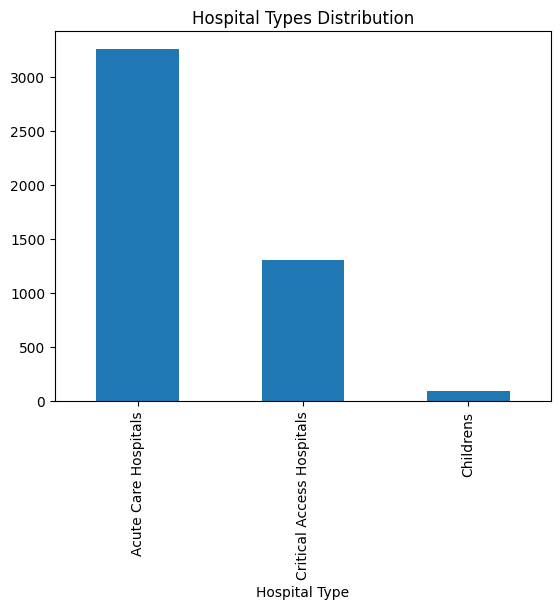

In [15]:
import matplotlib.pyplot as plt

data['Hospital Type'].value_counts().plot(kind='bar', title='Hospital Types Distribution')
plt.show()


In [16]:
# @title 1. Which hospital types dominate ownership categories?



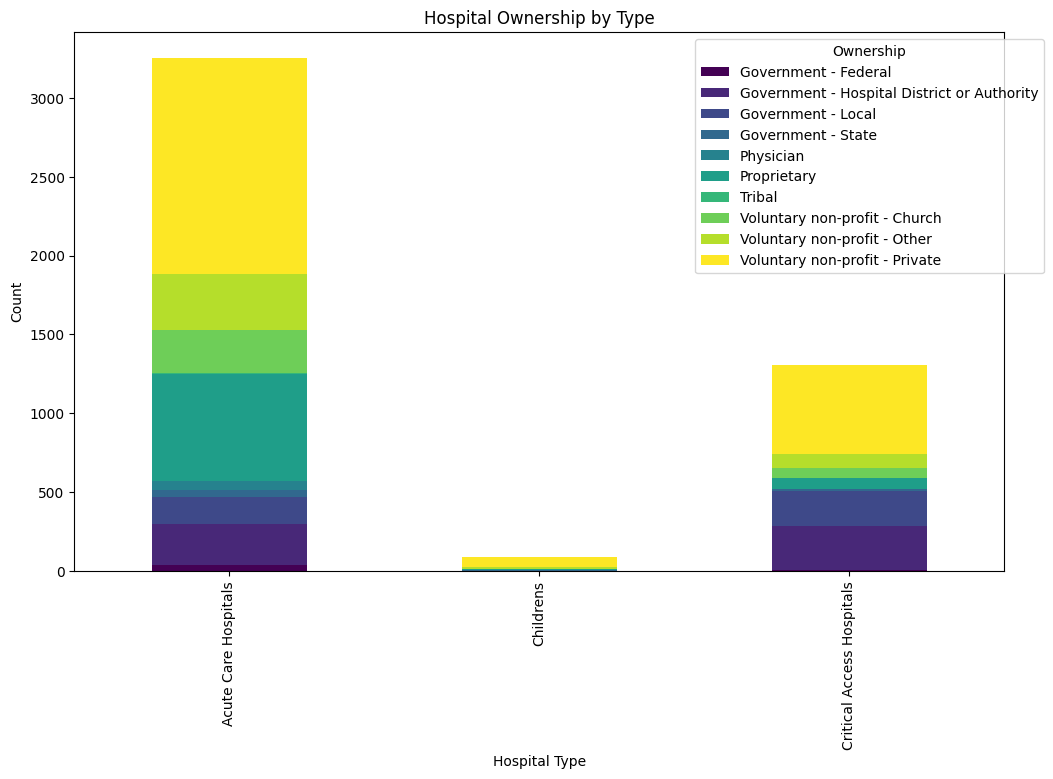

In [17]:
ownership_vs_type = pd.crosstab(data['Hospital Type'], data['Hospital Ownership'])
ownership_vs_type.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Hospital Ownership by Type')
plt.ylabel('Count')
plt.xlabel('Hospital Type')
plt.legend(title='Ownership', bbox_to_anchor=(1.05, 1))
plt.show()


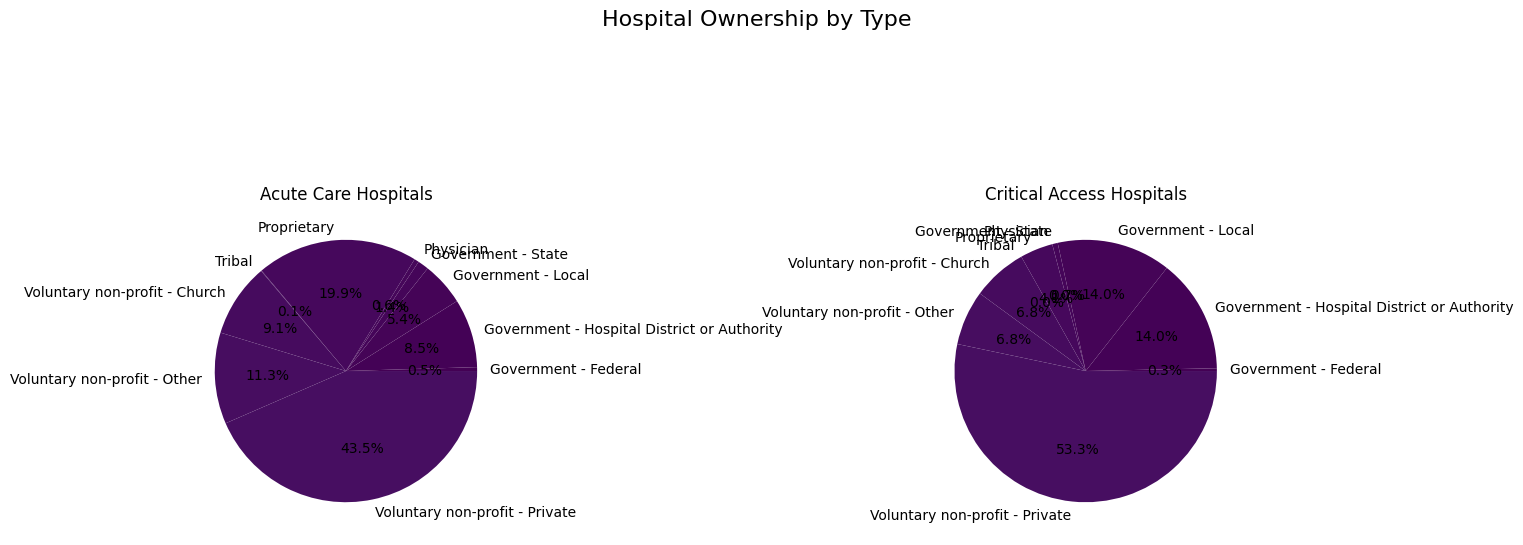

In [96]:
ownership_vs_type = pd.crosstab(data['Hospital Type'], data['Hospital Ownership'])

# Plotting the pie chart for each Hospital Type
fig, axes = plt.subplots(nrows=1, ncols=len(ownership_vs_type), figsize=(15, 7))

# Loop through each hospital type and plot a pie chart
for i, hospital_type in enumerate(ownership_vs_type.index):
    axes[i].pie(ownership_vs_type.loc[hospital_type], labels=ownership_vs_type.columns, autopct='%1.1f%%', colors=plt.cm.viridis.colors)
    axes[i].set_title(hospital_type)

plt.suptitle('Hospital Ownership by Type', fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
# @title 2. What is the state-wise distribution of hospital types?




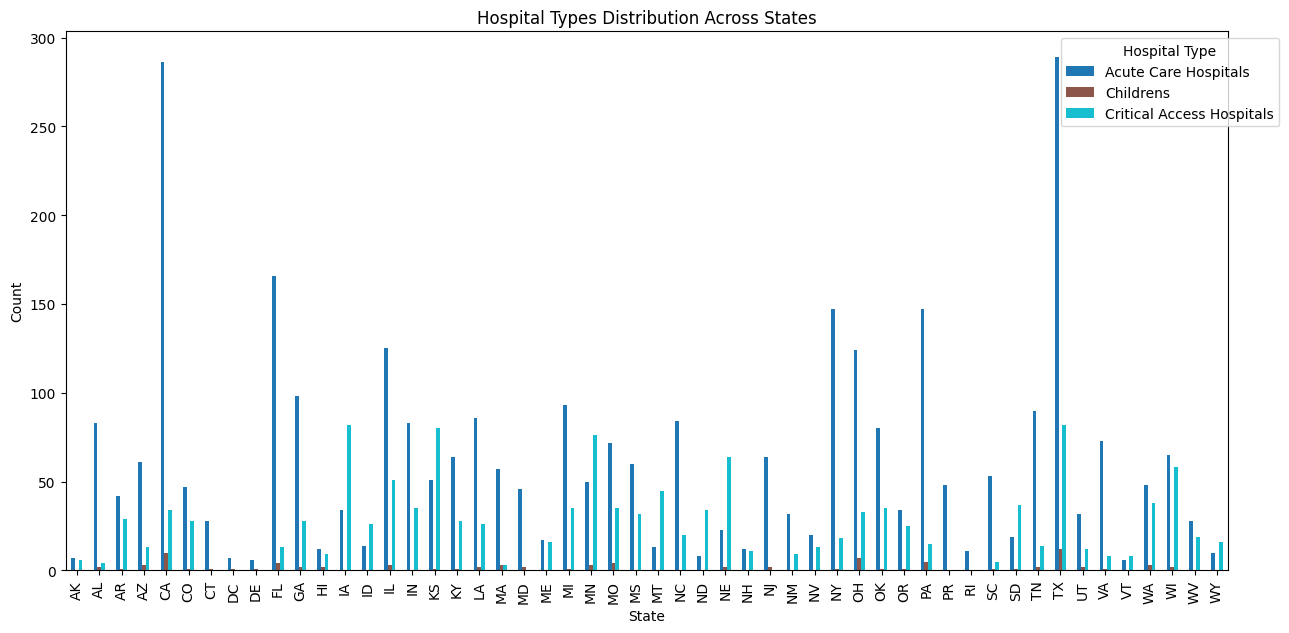

In [19]:
state_type_counts = pd.crosstab(data['State'], data['Hospital Type'])
state_type_counts.plot(kind='bar', figsize=(15, 7), colormap='tab10')
plt.title('Hospital Types Distribution Across States')
plt.ylabel('Count')
plt.xlabel('State')
plt.legend(title='Hospital Type', bbox_to_anchor=(1.05, 1))
plt.show()


In [20]:
# @title 3. Which states have the most hospitals?



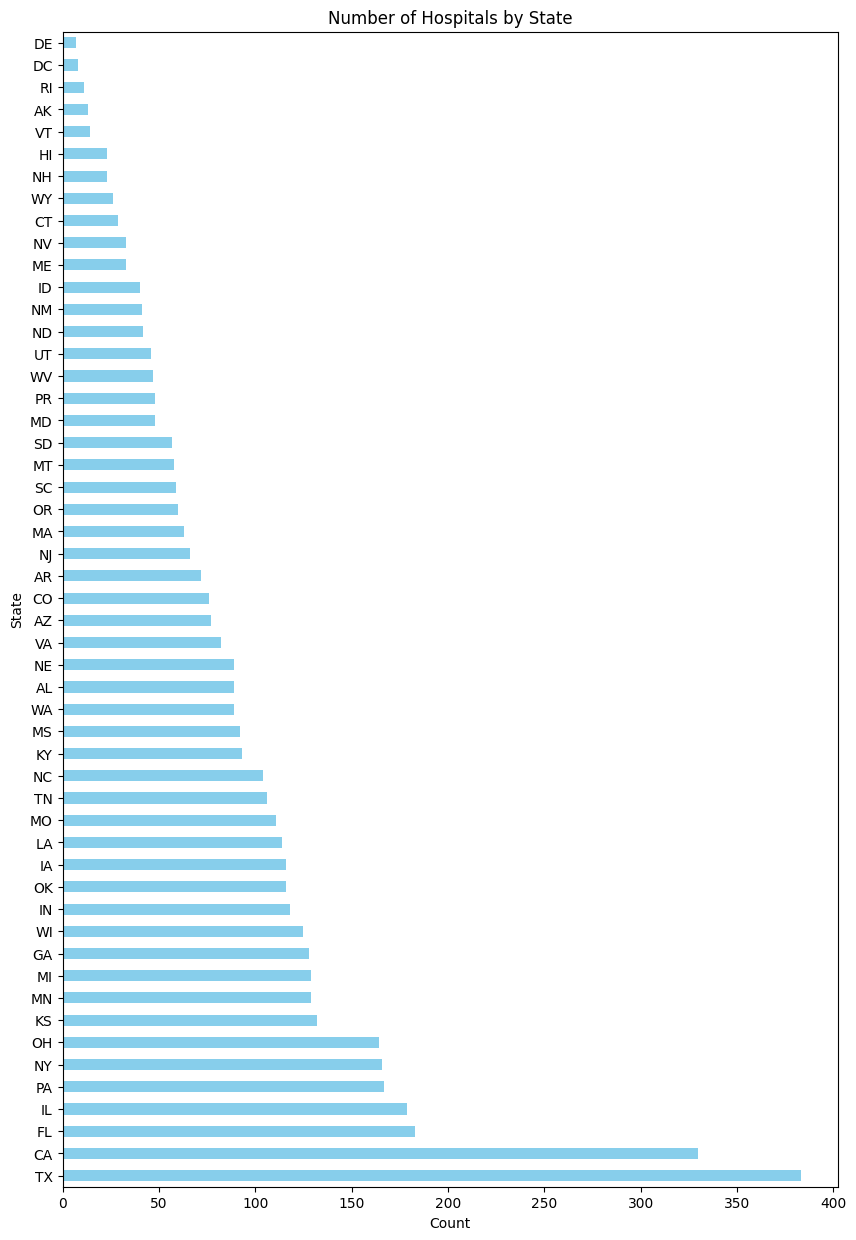

In [21]:
state_counts = data['State'].value_counts()
state_counts.plot(kind='barh', figsize=(10, 15), color='skyblue')
plt.title('Number of Hospitals by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

In [22]:
# @title 4. Are certain hospital types more likely to have higher ratings?



<ipython-input-23-5675b3060080>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Hospital Type', y='Hospital overall rating', palette='pastel')


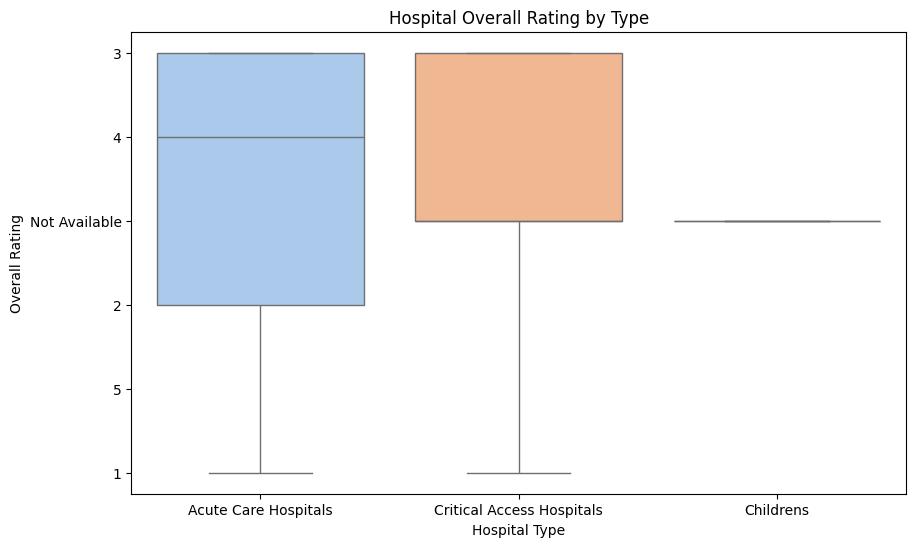

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Hospital Type', y='Hospital overall rating', palette='pastel')
plt.title('Hospital Overall Rating by Type')
plt.ylabel('Overall Rating')
plt.xlabel('Hospital Type')
plt.show()

In [24]:
# @title 5. What is the distribution of emergency services by ownership?


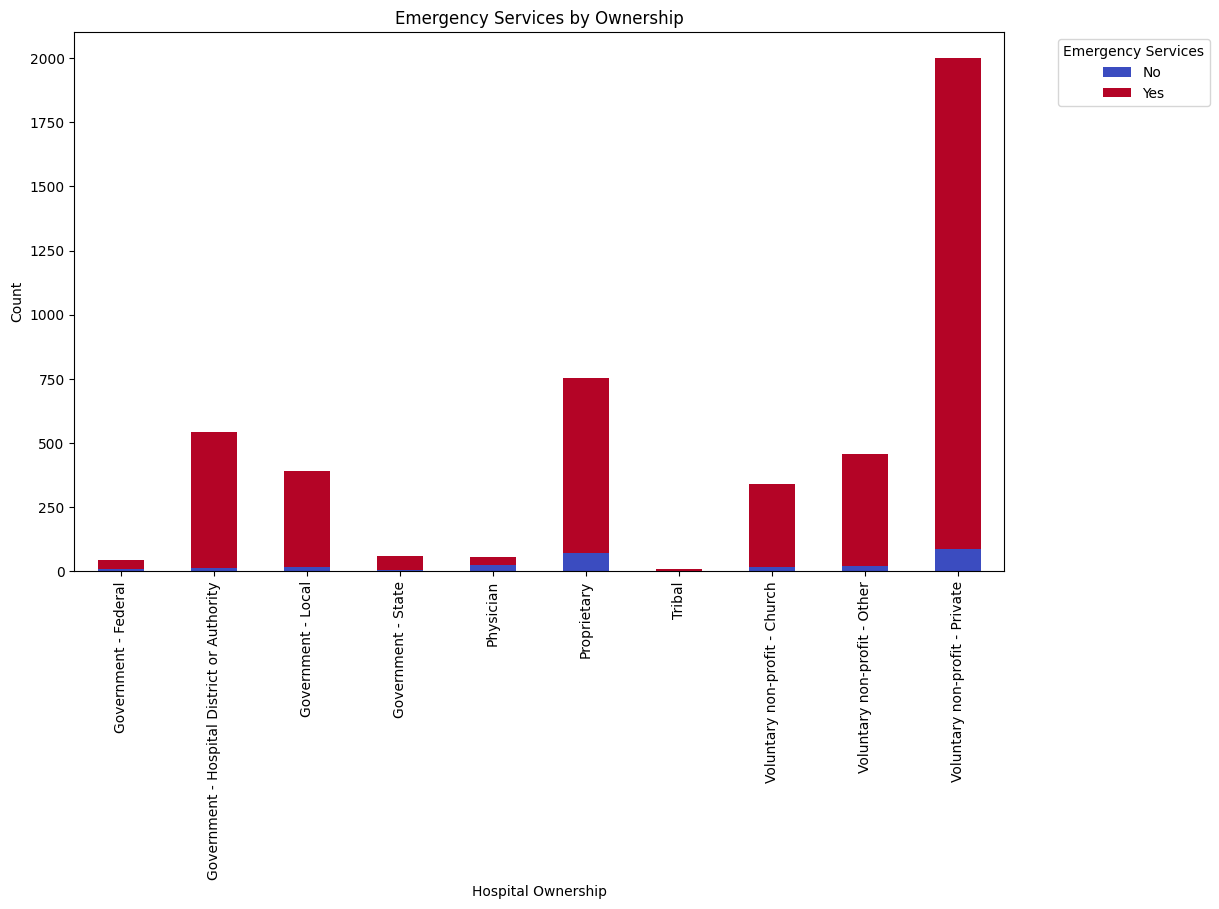

In [25]:
emergency_vs_ownership = pd.crosstab(data['Hospital Ownership'], data['Emergency Services'])
emergency_vs_ownership.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
plt.title('Emergency Services by Ownership')
plt.ylabel('Count')
plt.xlabel('Hospital Ownership')
plt.legend(['No', 'Yes'], title='Emergency Services', bbox_to_anchor=(1.05, 1))
plt.show()

In [26]:
# @title 6. Which ownership types dominate specific states?



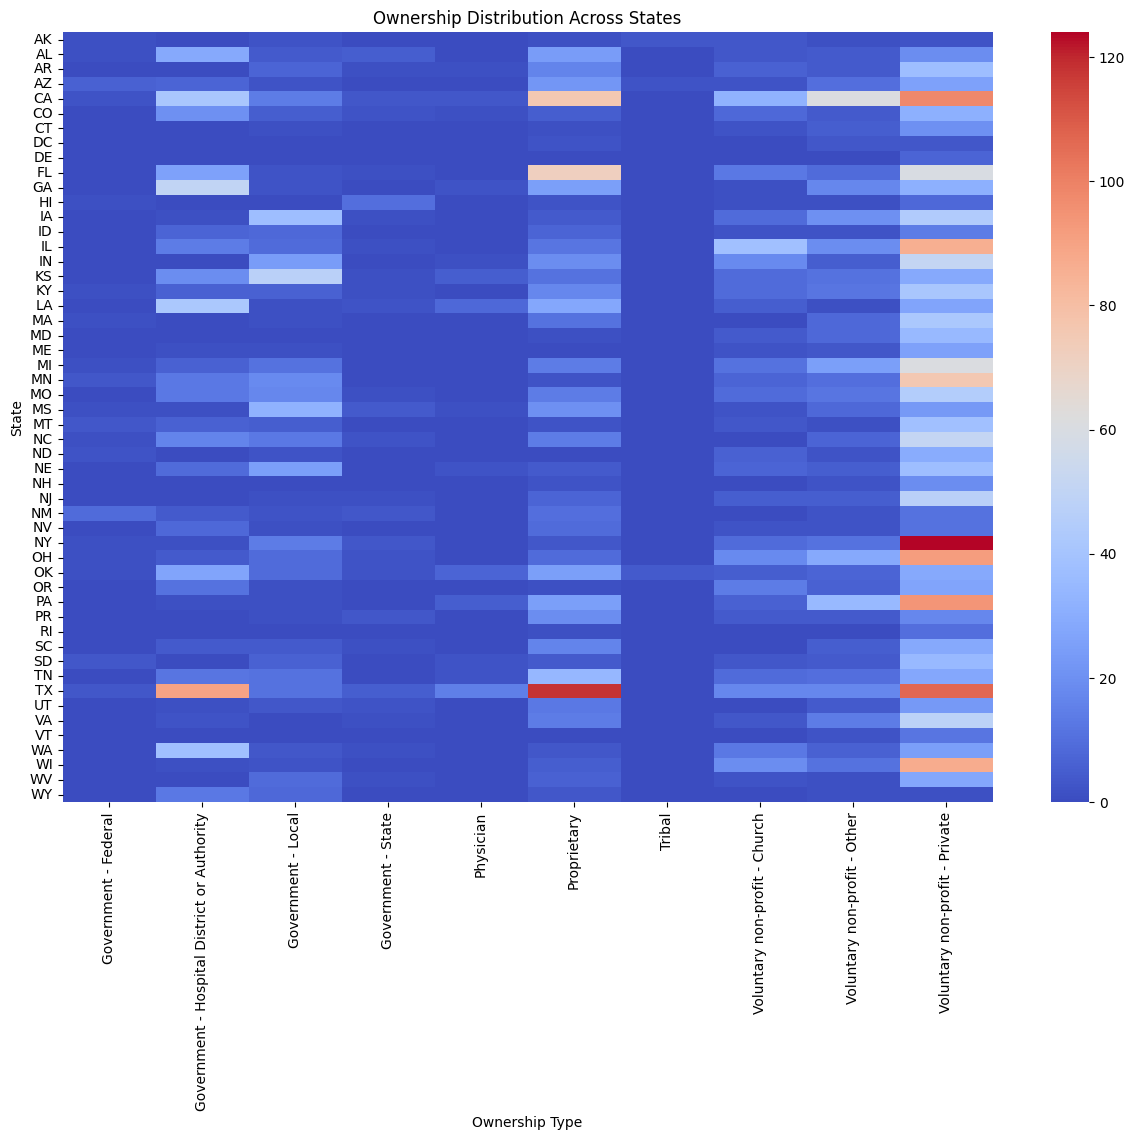

In [27]:
plt.figure(figsize=(15, 10))
ownership_state = pd.crosstab(data['State'], data['Hospital Ownership'])
sns.heatmap(ownership_state, cmap='coolwarm', annot=False)
plt.title('Ownership Distribution Across States')
plt.xlabel('Ownership Type')
plt.ylabel('State')
plt.show()


In [28]:
# @title 7. What percentage of hospitals provide emergency services?


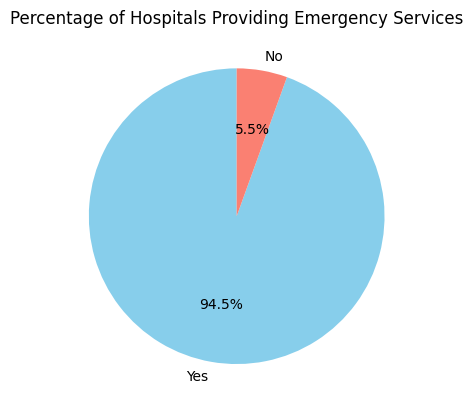

In [29]:
emergency_counts = data['Emergency Services'].value_counts()
emergency_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Yes', 'No'], colors=['skyblue', 'salmon'])
plt.title('Percentage of Hospitals Providing Emergency Services')
plt.ylabel('')
plt.show()


In [30]:
# @title 8.Which hospital ownership types are most common in each region (e.g., Northeast, South, etc.)?


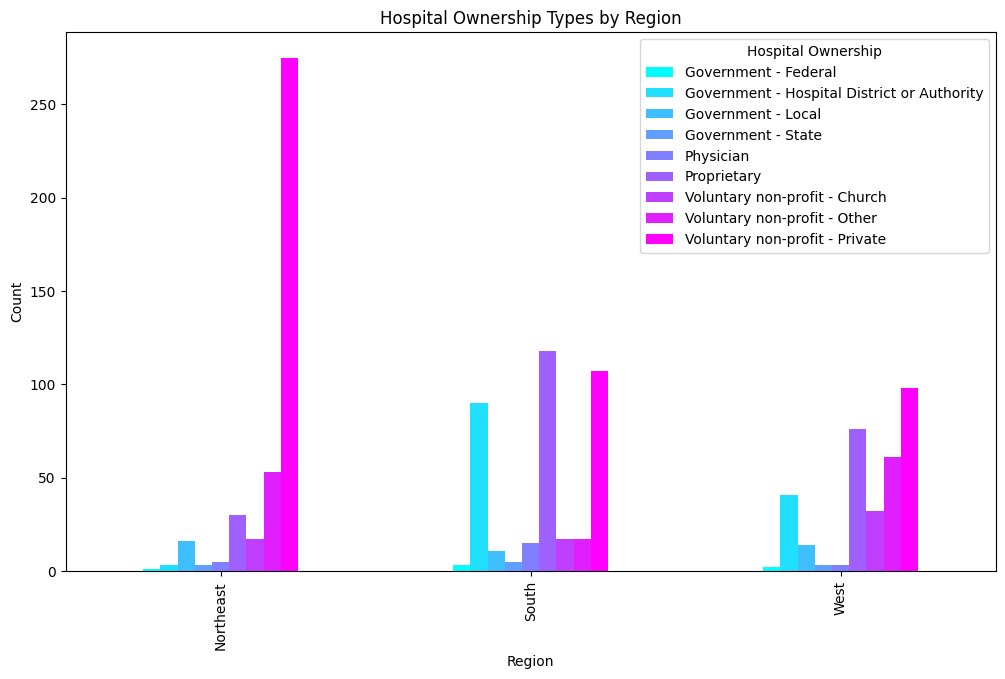

In [31]:
region_mapping = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'NY': 'Northeast', 'PA': 'Northeast', 'TX': 'South', 'CA': 'West'
}
data['Region'] = data['State'].map(region_mapping)
region_ownership = pd.crosstab(data['Region'], data['Hospital Ownership'])
region_ownership.plot(kind='bar', figsize=(12, 7), colormap='cool')
plt.title('Hospital Ownership Types by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()


In [32]:
# @title 9. Which hospital types tend to use medical imaging more efficiently?




<ipython-input-33-55c00736c845>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Hospital Type', y='Efficient use of medical imaging national comparison', palette='coolwarm')


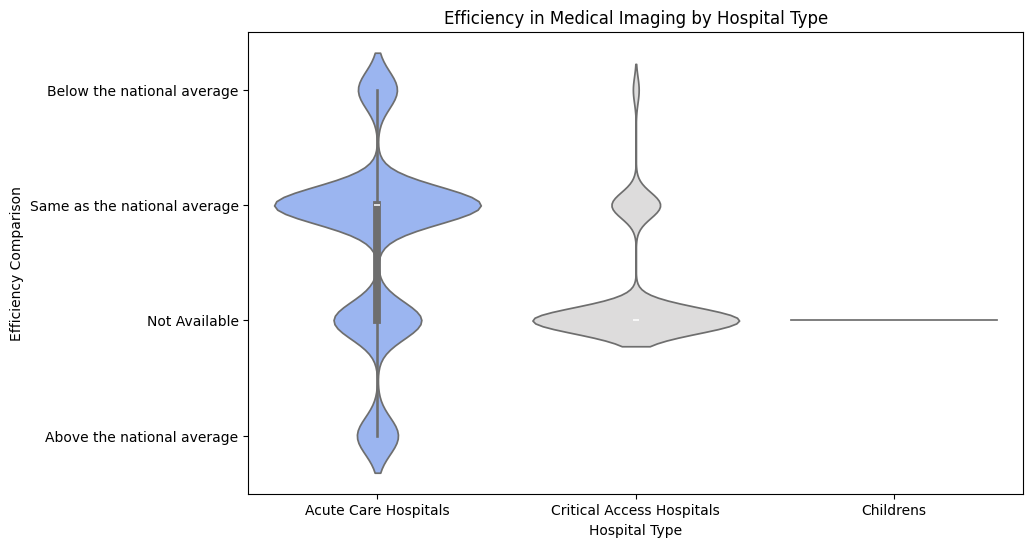

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Hospital Type', y='Efficient use of medical imaging national comparison', palette='coolwarm')
plt.title('Efficiency in Medical Imaging by Hospital Type')
plt.ylabel('Efficiency Comparison')
plt.xlabel('Hospital Type')
plt.show()


In [34]:
# @title 10. Are hospitals with higher ratings concentrated in certain counties?


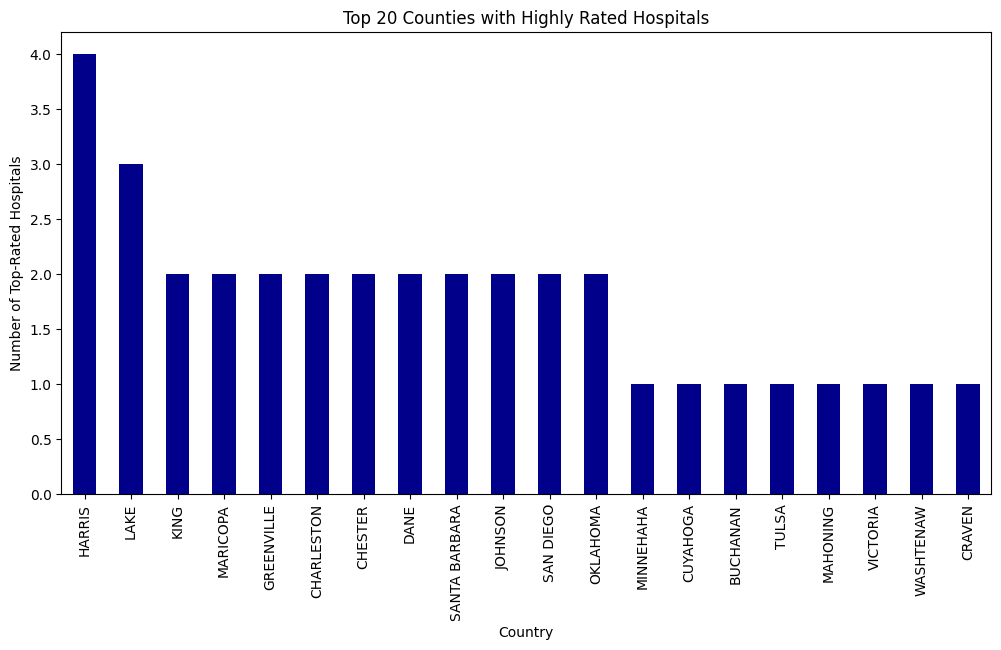

In [35]:
top_rated_hospitals = data[data['Hospital overall rating'] == '5']
county_counts = top_rated_hospitals['County Name'].value_counts()
county_counts.head(20).plot(kind='bar', figsize=(12, 6), color='darkblue')
plt.title('Top 20 Counties with Highly Rated Hospitals')
plt.xlabel('Country')
plt.ylabel('Number of Top-Rated Hospitals')
plt.show()


In [36]:
# @title 11. Hospitals by Ownership and Patient Experience


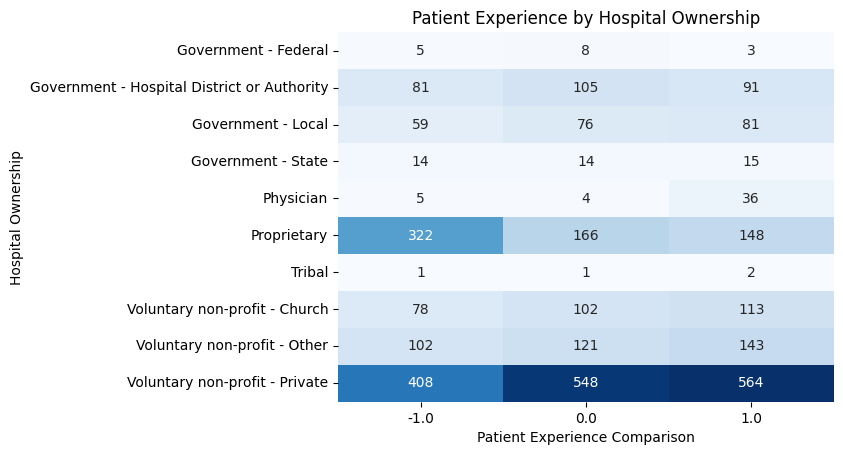

In [37]:
patient_experience = data['Patient experience national comparison'].map({'Above the national average': 1, 'Same as the national average': 0, 'Below the national average': -1})
pivot_table = pd.crosstab(data['Hospital Ownership'], patient_experience)
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Patient Experience by Hospital Ownership')
plt.xlabel('Patient Experience Comparison')
plt.ylabel('Hospital Ownership')
plt.show()


In [38]:
# @title 12. Timeliness of Care by Hospital Ownership

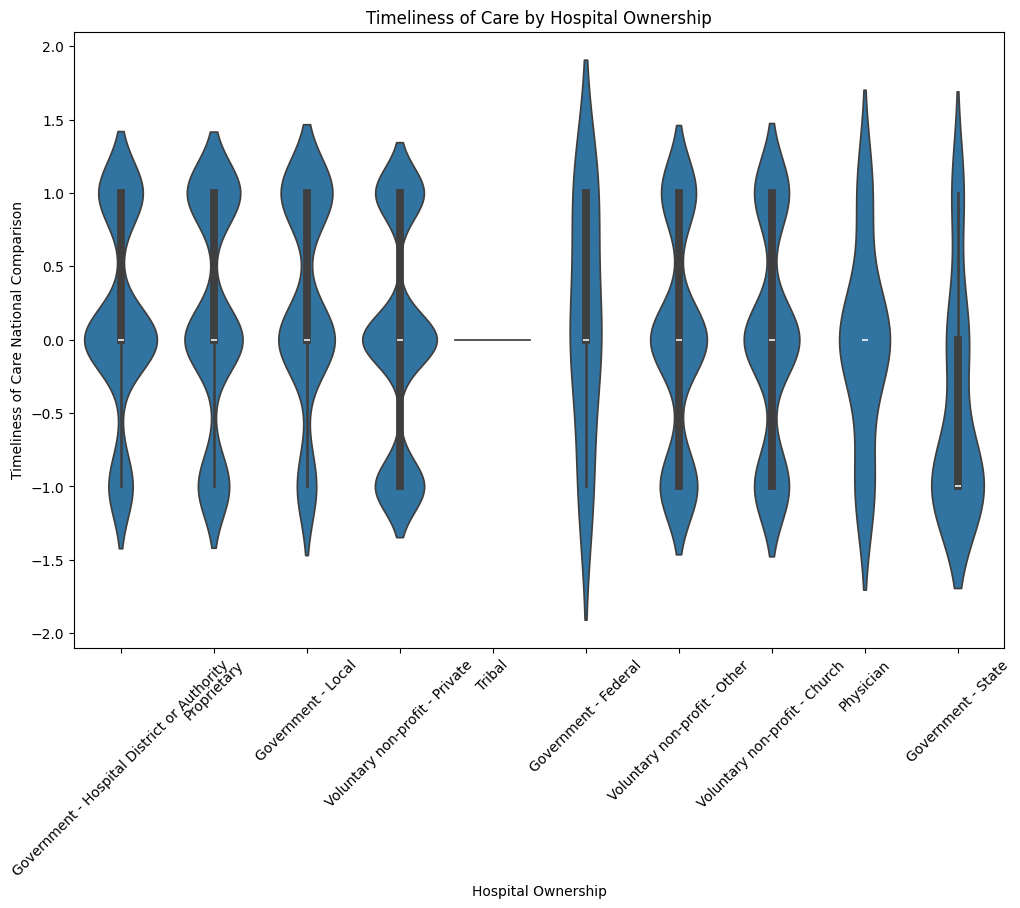

In [39]:
timeliness = data['Timeliness of care national comparison'].map({'Above the national average': 1, 'Same as the national average': 0, 'Below the national average': -1})
plt.figure(figsize=(12, 8))
sns.violinplot(x='Hospital Ownership', y=timeliness, data=data)
plt.title('Timeliness of Care by Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('Timeliness of Care National Comparison')
plt.xticks(rotation=45)
plt.show()


In [40]:
!pip install dash
!pip install jupyter-dash
!pip install plotly
!pip install pyngrok
!pip install dash jupyter-dash plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00


In [41]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np

data['Hospital overall rating'] = pd.to_numeric(data['Hospital overall rating'], errors='coerce')

data_cleaned = data.dropna(subset=['Hospital overall rating'])

app = dash.Dash(__name__)

avg_rating_by_type = data_cleaned.groupby('Hospital Type')['Hospital overall rating'].mean().reset_index()
fig_avg_rating = px.bar(avg_rating_by_type, x='Hospital Type', y='Hospital overall rating',
                        title="Average Hospital Rating by Hospital Type", labels={'Hospital Type': 'Type', 'Hospital overall rating': 'Average Rating'})

emergency_services = data['Emergency Services'].value_counts()
fig_emergency_services = px.pie(names=['Yes', 'No'], values=emergency_services, title="Emergency Services Availability")

mortality = data['Mortality national comparison'].map({'Above the national average': 1, 'Same as the national average': 0, 'Below the national average': -1})
fig_mortality = px.scatter(x=data['Hospital overall rating'], y=mortality, color=data['Hospital Type'],
                           title="Hospital Ratings vs Mortality National Comparison", labels={'x': 'Hospital Rating', 'y': 'Mortality Comparison'})

app.layout = html.Div([
    html.H1("Hospital Data Dashboard"),

    html.Div([
        html.Label('Select Hospital Type'),
        dcc.Dropdown(
            id='hospital-type-dropdown',
            options=[{'label': i, 'value': i} for i in data['Hospital Type'].unique()],
            value=data['Hospital Type'].unique()[0],
            style={'width': '50%'}
        )
    ]),

    html.Div([
        dcc.Graph(id='bar-plot', figure=fig_avg_rating),
    ]),

    html.Div([
        dcc.Graph(id='pie-plot', figure=fig_emergency_services),
    ]),

    html.Div([
        dcc.Graph(id='scatter-plot', figure=fig_mortality),
    ]),
])

@app.callback(
    dash.dependencies.Output('bar-plot', 'figure'),
    [dash.dependencies.Input('hospital-type-dropdown', 'value')]
)
def update_bar_plot(hospital_type):
    filtered_data = data_cleaned[data_cleaned['Hospital Type'] == hospital_type]
    avg_rating_by_type = filtered_data.groupby('Hospital Type')['Hospital overall rating'].mean().reset_index()
    fig = px.bar(avg_rating_by_type, x='Hospital Type', y='Hospital overall rating',
                 title=f"Average Hospital Rating for {hospital_type}", labels={'Hospital Type': 'Type', 'Hospital overall rating': 'Average Rating'})
    return fig

app.run_server(debug=True, use_reloader=False, port=8050)


<IPython.core.display.Javascript object>

In [42]:
# @title Model Building : To predict the Hospital Overall Rating based on various hospital features.


In [43]:
data['Hospital overall rating'] = pd.to_numeric(data['Hospital overall rating'], errors='coerce')

In [44]:
data = data.dropna(subset=['Hospital overall rating'])

In [45]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [46]:
X = data_encoded.drop("Hospital overall rating", axis=1)
y = data_encoded["Hospital overall rating"]

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=62, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Model Evaluation")
print(classification_report(y_test, rf_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Accuracy Score:", accuracy_score(y_test, rf_pred))


Random Forest Model Evaluation
              precision    recall  f1-score   support

         1.0       1.00      0.09      0.16        23
         2.0       0.62      0.47      0.53       135
         3.0       0.59      0.89      0.71       338
         4.0       0.69      0.35      0.46       197
         5.0       1.00      0.00      0.00        16

    accuracy                           0.61       709
   macro avg       0.78      0.36      0.37       709
weighted avg       0.65      0.61      0.57       709

Confusion Matrix:
 [[  2  20   1   0   0]
 [  0  63  72   0   0]
 [  0  18 301  19   0]
 [  0   1 128  68   0]
 [  0   0   4  12   0]]
Accuracy Score: 0.61212976022567


In [48]:
# @title The accuracy score of 0.6121 indicates that the Random Forest model correctly predicted the Hospital Overall Rating approximately 61.21% of the time on the test dataset.


In [49]:
# @title Lab Tasks


In [52]:
# @title 13. How does safety of care vary across states?


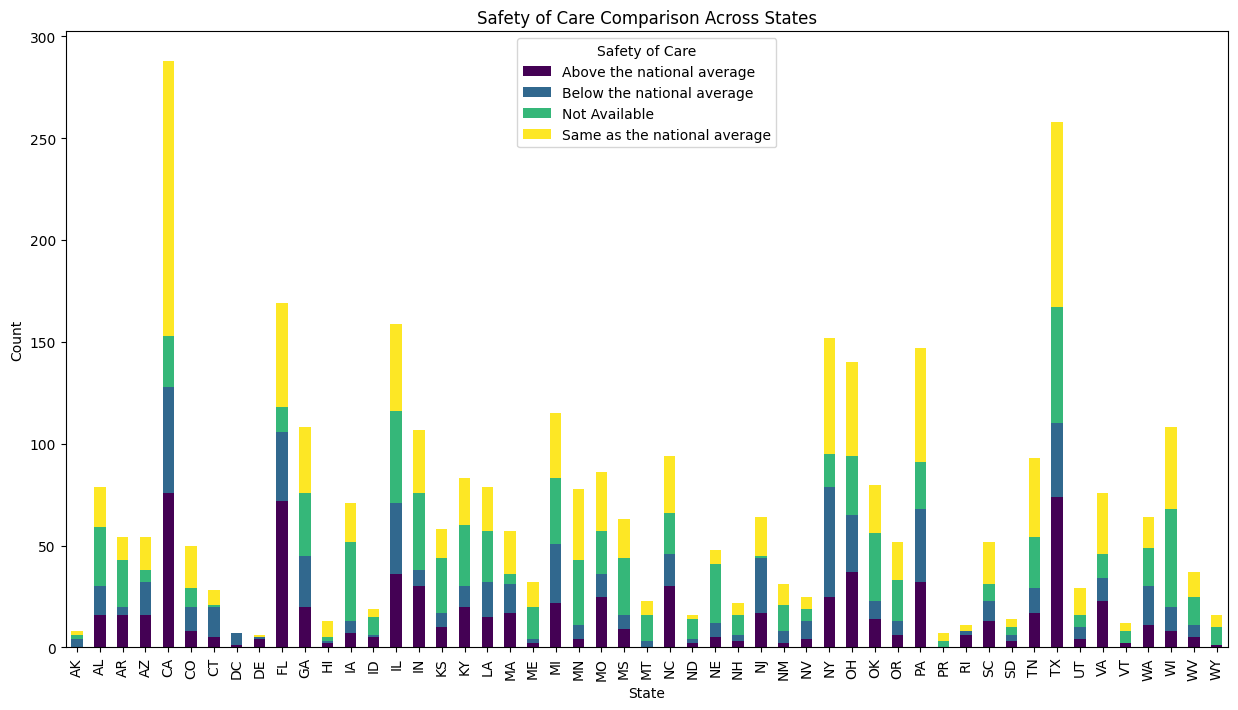

In [53]:
safety_state = pd.crosstab(data['State'], data['Safety of care national comparison'])
safety_state.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Safety of Care Comparison Across States')
plt.ylabel('Count')
plt.xlabel('State')
plt.legend(title='Safety of Care')
plt.show()

In [69]:
# @title 14. How does mortality performance vary by state?

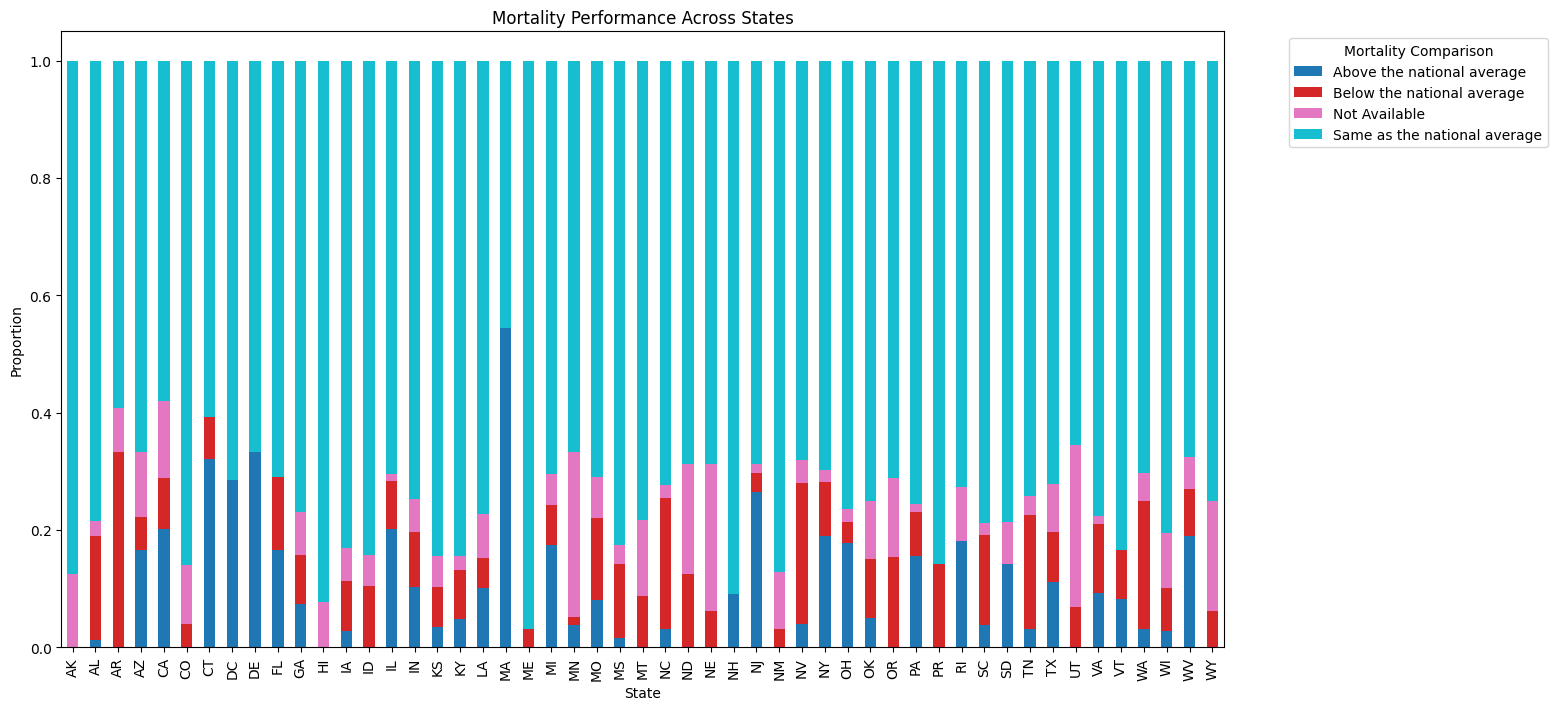

In [59]:
mortality_state = data.groupby('State')['Mortality national comparison'].value_counts(normalize=True).unstack()
mortality_state.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab10')
plt.title('Mortality Performance Across States')
plt.ylabel('Proportion')
plt.xlabel('State')
plt.legend(title='Mortality Comparison', bbox_to_anchor=(1.05, 1))
plt.show()


In [67]:
# @title 15. Which states have the highest number of hospitals with the best overall rating?

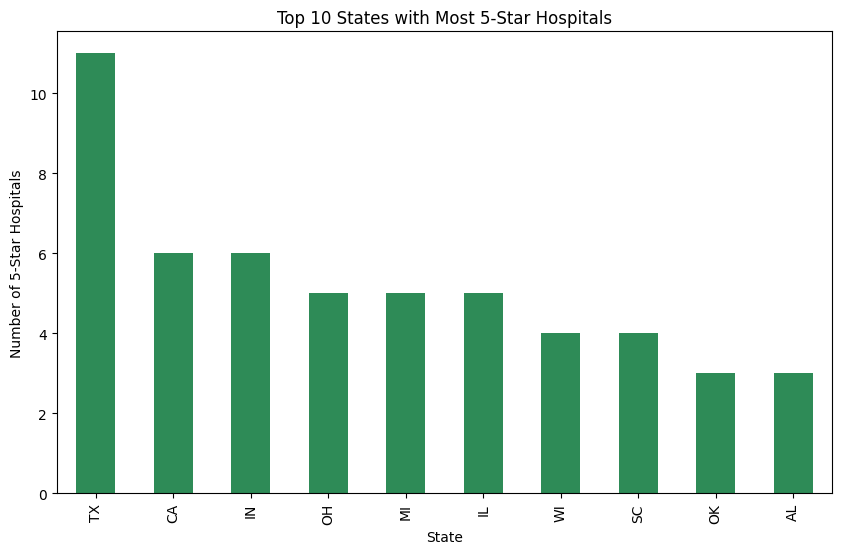

In [68]:
top_rated_states = data[data['Hospital overall rating'] == 5]['State'].value_counts().head(10)
top_rated_states.plot(kind='bar', figsize=(10, 6), color='seagreen')
plt.title('Top 10 States with Most 5-Star Hospitals')
plt.xlabel('State')
plt.ylabel('Number of 5-Star Hospitals')
plt.show()


In [70]:
# @title 16. How does hospital type vary with medical imaging efficiency?


<ipython-input-73-27efa1f50f2e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




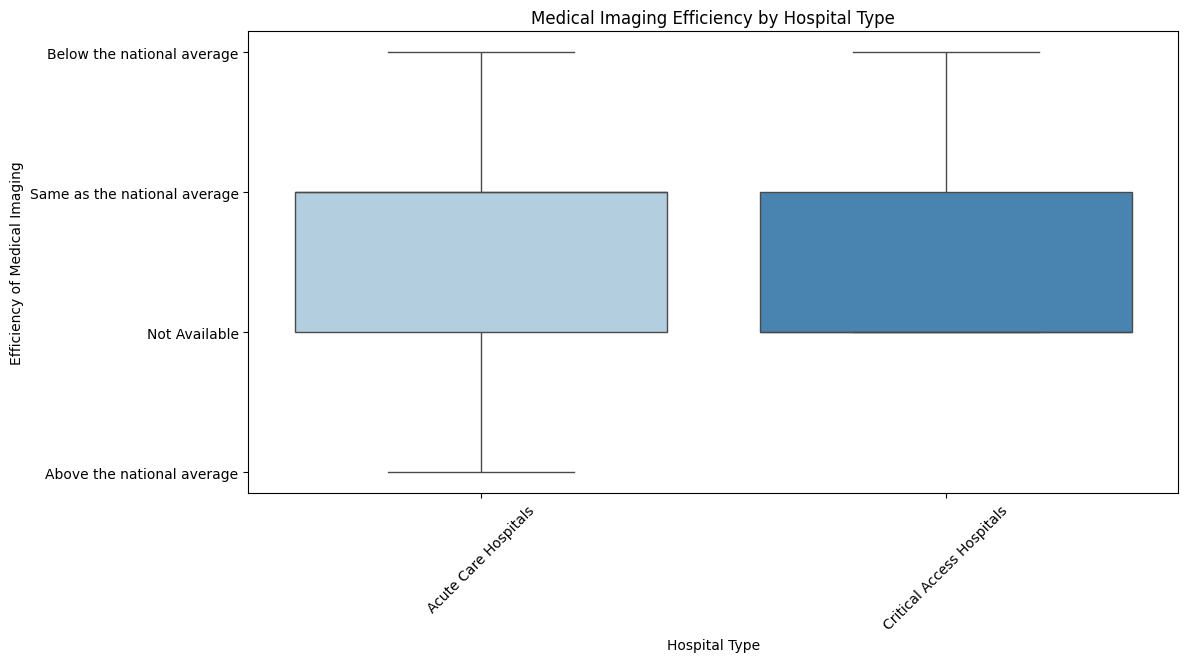

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Hospital Type', y='Efficient use of medical imaging national comparison', palette='Blues')
plt.title('Medical Imaging Efficiency by Hospital Type')
plt.xlabel('Hospital Type')
plt.ylabel('Efficiency of Medical Imaging')
plt.xticks(rotation=45)
plt.show()


In [74]:
# @title 17. What is the distribution of owenership types across the regions?


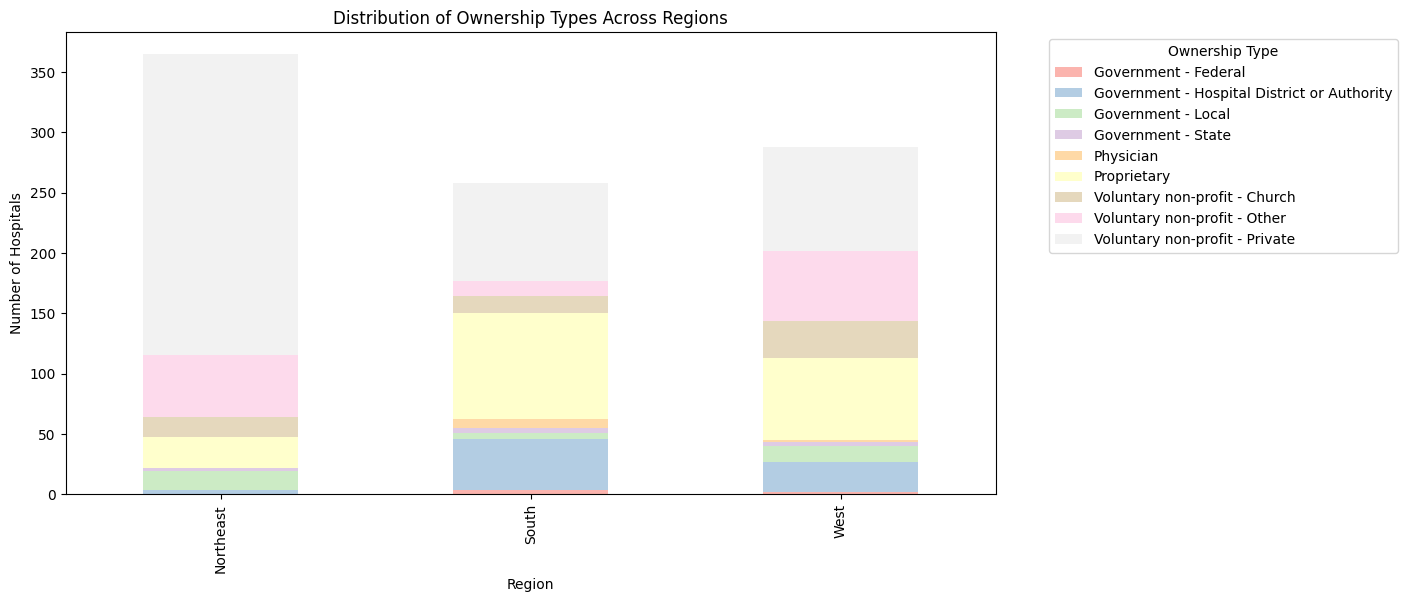

In [75]:
region_ownership = pd.crosstab(data['Region'], data['Hospital Ownership'])
region_ownership.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title('Distribution of Ownership Types Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Hospitals')
plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1))
plt.show()

In [76]:
# @title 18. Which state has highest number of hospitals from below-average patient experience?


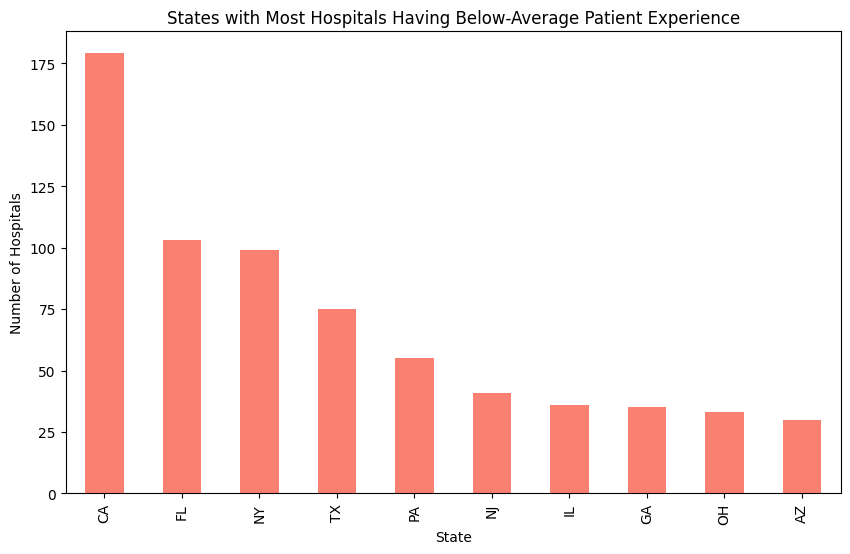

In [77]:
below_avg_patient_exp = data[data['Patient experience national comparison'] == 'Below the national average']['State'].value_counts().head(10)
below_avg_patient_exp.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('States with Most Hospitals Having Below-Average Patient Experience')
plt.xlabel('State')
plt.ylabel('Number of Hospitals')
plt.show()

In [81]:
# @title 19. How is patient experience distributed across the regions?


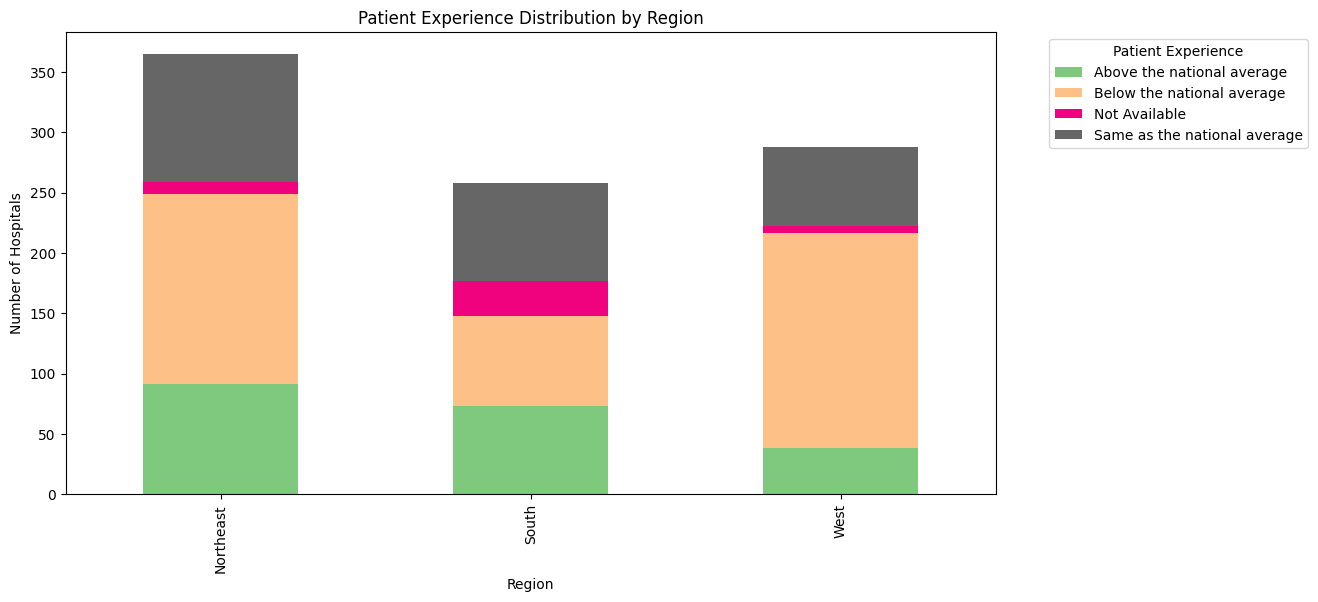

In [82]:
region_patient_exp = pd.crosstab(data['Region'], data['Patient experience national comparison'])
region_patient_exp.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Patient Experience Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Hospitals')
plt.legend(title='Patient Experience', bbox_to_anchor=(1.05, 1))
plt.show()


In [86]:
# @title 19. How does morality performance measure by hospital ownership?


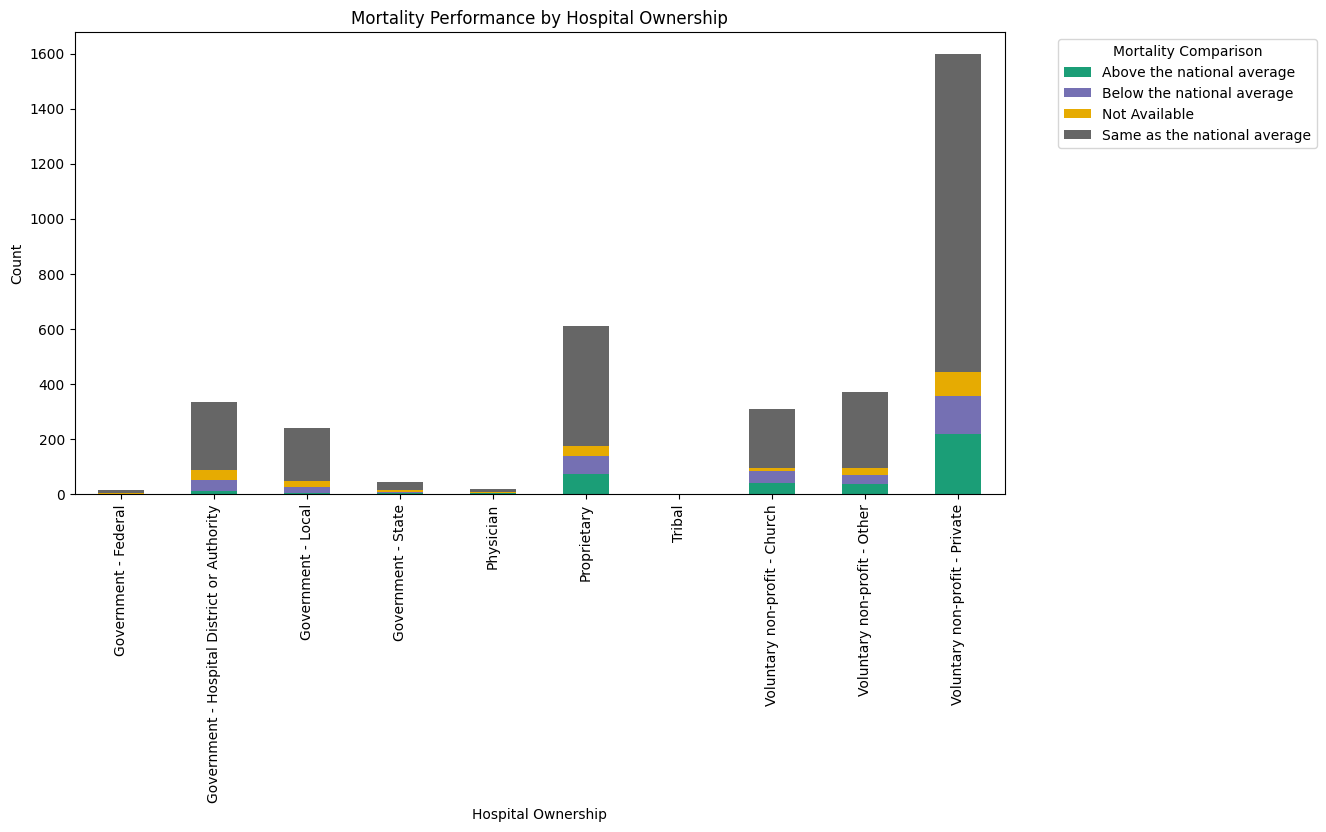

In [87]:
mortality_ownership = pd.crosstab(data['Hospital Ownership'], data['Mortality national comparison'])
mortality_ownership.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Dark2')
plt.title('Mortality Performance by Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('Count')
plt.legend(title='Mortality Comparison', bbox_to_anchor=(1.05, 1))
plt.show()